
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


<!DOCTYPE html>
<html>
    <body>
<p>This data set contains information about 10,000 movies collected from The Movie Database.It describes the budgets,revenues,popularity and the genres of the movies.It also shows the release dates of movies,its cast,directors and production companies to mention a few.
<br>The data set contains 21 columns:
  <br>-id-its the unique identifier for every movie.
  <br>-imdb_id-shows the identity of a movie.
 <br>-popularity-shows how popular the movie is.
 <br>-budget-the amount it will cost to make the movie.
 <br>-revenue-the amount of income generated by a movie.
 <br>-original title-the original title of the movie.
 <br>-cast-the actors in the movie.
 <br>-homepage-link that will take you to the movie.
 <br>-director-creative lead of the movie.
 <br>-tagline-short text associated with the film.
 <br>-keywords-words attached to the movie.
 <br>-overview-summary of the movie.
 <br>-runtime-the length of the movie.
 <br>-genre-category in which a movie belongs
 <br>-production companies-where a movie was produced.
 <br>-release date-the date in which a movie was released.
 <br>-vote count-number of votes a movie received.
 <br>-vote average-average votes a movie received.
 <br>-release year-the year when a movie was released.
 <br>-budget_adj-the amount it will take to produce amovie in 2010 dollars.
 <br>-revenue_adj-amount generated by a movie in 2010 dollars.
        </p>
    </body>
    </html>

### Question(s) for Analysis
</DOCTYPE>
<html>
<body>
    <p>QUESTIONS THIS ANALYSIS WILL ANSWER
        <br>1.Top eleven movies that generated more money for the respective production companies.
        <br>2.Which movies received a higher number of votings(Top ten)?
        <br>3.Number of movies released since the year 2000
        <br>4.What is the correlation between runtime,vote count and popularity?
        <br>5.Which movies used alot of money for production?
        <br>6.What is the correlation between profit,budget and revenue?

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.1

Requirement already up-to-date: pandas==0.25.1 in /opt/conda/lib/python3.6/site-packages (0.25.1)


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
#loading dataset
df=pd.read_csv('tmdb-movies (1).csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<h1 style="color:black;font-size:20px;">Investigating the dataset</h1></a>


In [3]:
#to get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#to get dimensions of the dataframe
df.shape

(10866, 21)

In [5]:
#to see the datatypes
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
#to get descriptive statistics of each column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



<h1 style="color:black;font-size:20px;">Data cleaning</h1></a>
</DOCTYPE>
<html>
<body>
    <p>1.Dropping columns that are not relevant to my analysis.
        <br>2.Checking and dropping rows with missing data.
        <br>3.Checking for duplicates and removing them.
        <br>4.Mismatched datatypes:Converting release_date from object to datetime format.
        <br>5.Replacing zero values with mean.
        


<h1 style="color:black;font-size:20px;">Dropping columns not relevant to my analysis</h1></a>


In [7]:
#deleting columns that are not relevant
df.drop(['imdb_id','homepage','keywords','cast','tagline','overview'],axis=1,inplace=True)

In [8]:
#checking the remaining columns
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

<h1 style="color:black;font-size:20px;">Checking and dropping rows with missing data</h1></a>


In [9]:
#to get columns with missing data
df.isnull().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
director                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [10]:
#dropping missing data
df.dropna(inplace=True)
df.isnull().any().sum()

0

In [11]:
#dimensions of the dataframe after dropping
df.shape

(9807, 15)

<h1 style="color:black;font-size:20px;">Checking for duplicates and removing them</h1></a>


In [12]:
#geting the number of duplicates
df.duplicated().sum()

1

In [13]:
#removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

<h1 style="color:black;font-size:20px;">Mismatched datatypes</h1></a>


In [14]:
#checking for mismatched datatypes
df.dtypes

id                        int64
popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [15]:
#changing release date to datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 15 columns):
id                      9806 non-null int64
popularity              9806 non-null float64
budget                  9806 non-null int64
revenue                 9806 non-null int64
original_title          9806 non-null object
director                9806 non-null object
runtime                 9806 non-null int64
genres                  9806 non-null object
production_companies    9806 non-null object
release_date            9806 non-null datetime64[ns]
vote_count              9806 non-null int64
vote_average            9806 non-null float64
release_year            9806 non-null int64
budget_adj              9806 non-null float64
revenue_adj             9806 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 1.2+ MB


<h1 style="color:black;font-size:20px;">Replacing zero values with mean:</h1></a>
    <h1 style="color:black;font-size:18px;">Budget column</h1></a>
     

In [16]:
#checking if budget column has zero values
df[df['budget']==0].head()



,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,0,29355203,Mr. Holmes,Bill Condon,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,0,22354572,Solace,Afonso Poyart,101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,0,45895,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00


In [17]:
#getting the mean to replace the zero values
mean=df['budget'].mean()
mean

16125246.91495003

In [18]:
#replacing the zero values with mean
df['budget'].replace(0,mean,inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [19]:
#confirming there are no zero values
df[df['budget']==0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<h1 style="color:black;font-size:18px;">Revenue column</h1></a>


In [20]:
#checking if revenue column has zero values
df[df['revenue']==0].head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.932340,3.000000e+07,0,Wild Card,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,2.331636,2.000000e+07,0,Survivor,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,2.165433,1.612525e+07,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,308369,2.141506,1.612525e+07,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,370687,1.876037,1.612525e+07,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0


In [21]:
#getting the mean to replace the zero values
mean_1=df['revenue'].mean()
mean_1

44077849.542728938

In [22]:
#replacing the zero values with mean
df['revenue'].replace(0,mean_1,inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [23]:
#confirming there are no zero values
df[df['revenue']==0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<h1 style="color:black;font-size:18px;">Runtime column</h1></a>


In [24]:
#checking if revenue column has zero values
df[df['runtime']==0].head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,1.876037,1.612525e+07,4.407785e+07,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
334,361931,0.357654,1.612525e+07,4.407785e+07,Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015,0.000000e+00,0.0
445,353345,0.218528,1.612525e+07,4.407785e+07,The Exorcism of Molly Hartley,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015,0.000000e+00,0.0
486,333653,0.176744,1.612525e+07,4.407785e+07,If There Be Thorns,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015,0.000000e+00,0.0
1289,286372,0.037459,3.250000e+06,4.407785e+07,Treehouse,Michael G. Bartlett,0,Thriller|Horror|Mystery,Tiberius Film,2014-10-20,16,3.4,2014,2.993546e+06,0.0


In [25]:
#getting the mean to replace the zero values
mean_2=df['runtime'].mean()
mean_2

102.74434019987763

In [26]:
#replacing the zero values with mean
df['runtime'].replace(0,mean_2,inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [27]:
#confirming there are no zero values
df[df['runtime']==0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<h1 style="color:black;font-size:18px;">Budget_adj column</h1></a>


In [28]:
#checking if budget_adj column has zero values
df[df['budget_adj']==0].head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,3.927333,1.612525e+07,2.935520e+07,Mr. Holmes,Bill Condon,103.0,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.0,2.700677e+07
36,339527,3.358321,1.612525e+07,2.235457e+07,Solace,Afonso Poyart,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.0,2.056620e+07
72,284289,2.272044,1.612525e+07,4.589500e+04,Beyond the Reach,Jean-Baptiste LÃ©onetti,95.0,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.0,4.222338e+04
74,347096,2.165433,1.612525e+07,4.407785e+07,Mythica: The Darkspore,Anne K. Black,108.0,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.0,0.000000e+00
75,308369,2.141506,1.612525e+07,4.407785e+07,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105.0,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.0,0.000000e+00


In [29]:
#getting the mean to replace the zero values
mean_3=df['budget_adj'].mean()
mean_3

19350695.509587806

In [30]:
#replacing the zero values with mean
df['budget_adj'].replace(0,mean_3,inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [31]:
#confirming there are no zero values
df[df['budget_adj']==0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


<h1 style="color:black;font-size:18px;">Budget_adj column</h1></a>


In [32]:
#checking for zero values
df[df['revenue_adj']==0].head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,2.932340,3.000000e+07,4.407785e+07,Wild Card,Simon West,92.00000,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,334074,2.331636,2.000000e+07,4.407785e+07,Survivor,James McTeigue,96.00000,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,347096,2.165433,1.612525e+07,4.407785e+07,Mythica: The Darkspore,Anne K. Black,108.00000,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,1.935070e+07,0.0
75,308369,2.141506,1.612525e+07,4.407785e+07,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105.00000,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,1.935070e+07,0.0
92,370687,1.876037,1.612525e+07,4.407785e+07,Mythica: The Necromancer,A. Todd Smith,102.74434,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,1.935070e+07,0.0


In [33]:
#getting the mean to replace the zero values
mean_4=df['revenue_adj'].mean()
mean_4

56855277.831240244

In [34]:
#replacing the zero values with mean
df['revenue_adj'].replace(0,mean_4,inplace=True)
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


In [35]:
#confirming there are no zero values
df[df['revenue_adj']==0]

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [36]:
#confirming there are no zero values in any column
df.columns==0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [37]:
df.head(3)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

> 


### Research Question 1 (Top eleven movies that generated more money for the respective production companies)

In [38]:
#to get the profits we subtract revenue earned from the money spent on budget and create a new column profit
df['profit']=df['revenue']-df['budget']


In [39]:
#to confirm profit row has been added
df.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08


In [40]:
#sorting the profits from largest with their titles
df2=df.sort_values(by=['profit','original_title'],ascending=False)[['profit','original_title']]

#getting the top eleven movies
df3=df2.head(11)
df3

,profit,original_title
1386,2.544506e+09,Avatar
3,1.868178e+09,Star Wars: The Force Awakens
5231,1.645034e+09,Titanic
0,1.363529e+09,Jurassic World
4,1.316249e+09,Furious 7
4361,1.299558e+09,The Avengers
3374,1.202818e+09,Harry Potter and the Deathly Hallows: Part 2
14,1.125036e+09,Avengers: Age of Ultron
5422,1.124219e+09,Frozen
8094,1.084280e+09,The Net


In [41]:
#creating a function for labelling the graphs
def label(x,y,z):
    title =('title')
    xlabel=('xlabel')
    ylabel=('ylabel')
    
    Returns:(label)
        
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(z)
   
       
          
            

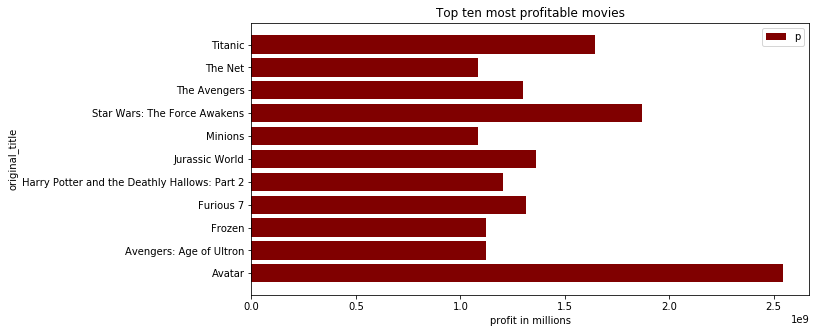

In [42]:
#making a horizontal bar graph to show the profitable movies
fig=plt.figure(figsize=(10,5))
plt.barh(df3.original_title,df3.profit,color='maroon')
plt.legend('profit')
label('profit in millions','original_title','Top ten most profitable movies')
plt.show()


<b></a>
The above horizontal bar graph shows the top ten movie titles that bring the most profit to production companies together with the amount of profit they bring.According to the analysis Avatar brings the most profit.

<h1 style="color:black;font-size:20px;">Research Question 2 (Which movies received a higher number of votings?)</h1></a>


In [43]:
#sorting movies according to their vote counts
higher_vote=df.sort_values(by=['vote_count','original_title'],ascending=False)[['vote_count','original_title']]

#getting the top ten most voted movies
df_vote=higher_vote.head(10)
df_vote

,vote_count,original_title
1919,9767,Inception
4361,8903,The Avengers
1386,8458,Avatar
2875,8432,The Dark Knight
4364,7375,Django Unchained
4382,7080,The Hunger Games
5425,6882,Iron Man 3
4363,6723,The Dark Knight Rises
629,6498,Interstellar
4367,6417,The Hobbit: An Unexpected Journey


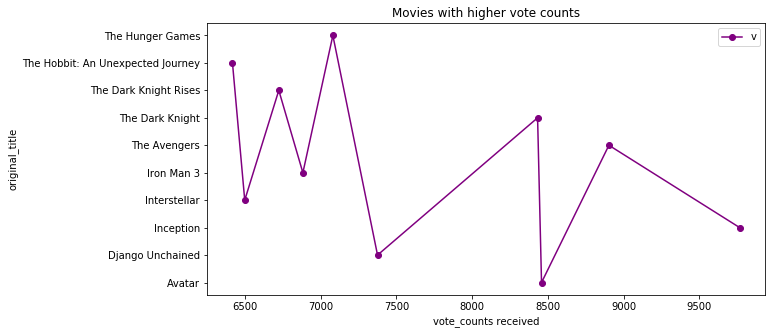

In [44]:
#plotting a line graph to show the movies that received higher votes
fig=plt.figure(figsize=(10,5))
plt.plot(df_vote.vote_count,df_vote.original_title,color='purple',marker='o')
plt.legend('vote_counts')
label('vote_counts received','original_title','Movies with higher vote counts')
plt.show()

<b></a>
The graph shows peoples votings for movies they like.The analysis shows that Inception is the most voted movie with 9767 vote counts.

<h1 style="color:black;font-size:20px;">Research Question 3 (Number of Movies released since the year 2000)</h1></a>


In [45]:
#to get the movies released after the year 2000
df_year=df[df['release_year']>=2000]
df_year.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


In [46]:
#to count the number of movies released after 2000
df_count=df_year['release_year'].value_counts()
df_count

2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
2005    324
2003    254
2004    253
2002    243
2001    212
2000    197
Name: release_year, dtype: int64

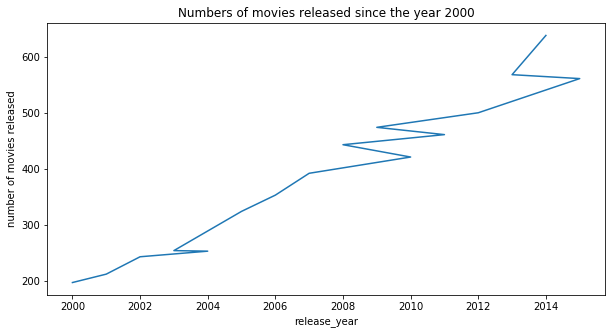

In [47]:
#plotting to see the number of movies released each year
fig=plt.figure(figsize=(10,5))
df_count.plot()
label('release_year','number of movies released','Numbers of movies released since the year 2000')

plt.show()

<b></a>
The analysis shows how the amount of produced movies have changed over the years.The number of movies produced keep increasing each year as per the graph with 2014 producing 638 movies which is an increase from the previous year.

<h1 style="color:black;font-size:20px;">Research Question 4(What is the correlation between runtime,vote count and popularity?)</h1></a>


In [48]:
#to see correlation between runtime and vote_count
runtime=df['runtime']
vote_count=df['vote_count']
correlation=runtime.corr(vote_count)

correlation

0.18425804603998452

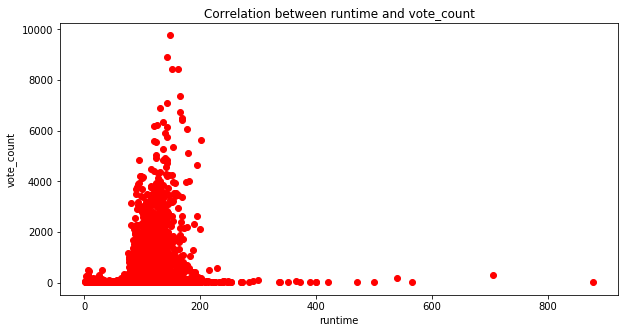

In [49]:
#plotting the correlation using scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(runtime,vote_count,color='red')
label('runtime','vote_count','Correlation between runtime and vote_count')

plt.show()

<b></a>
The scatter plot shows relationship between two variables which are runtime and vote count.

In [50]:
#correlation between runtime and popularity
runtime=df['runtime']
popularity=df['popularity']
correlation=runtime.corr(popularity)
correlation

0.15659706313043445

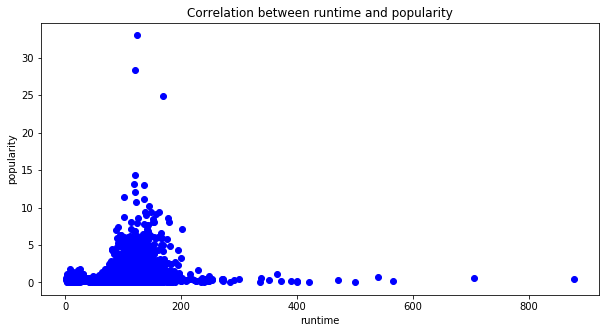

In [51]:
#plotting the correlation using scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(runtime,popularity,color='blue')
label('runtime','popularity','Correlation between runtime and popularity')

plt.show()

<b></a>
I used a scatter plot to easily show the relationship and correlation between runtime and popularity because they pair well together.

<h1 style="color:black;font-size:20px;">Research Question 5(Which movies used alot of money for production?)</h1></a>
 

In [52]:
#to sort movies that used more money for production we look at the budgets
df_high=df.sort_values(by=['budget','original_title'],ascending=False)[['budget','original_title']]
#to get the top ten
df_budget=df_high.head(10)
df_budget

,budget,original_title
2244,425000000.0,The Warrior's Way
3375,380000000.0,Pirates of the Caribbean: On Stranger Tides
7387,300000000.0,Pirates of the Caribbean: At World's End
14,280000000.0,Avengers: Age of Ultron
6570,270000000.0,Superman Returns
1929,260000000.0,Tangled
4411,260000000.0,John Carter
7394,258000000.0,Spider-Man 3
5508,255000000.0,The Lone Ranger
643,250000000.0,X-Men: Days of Future Past


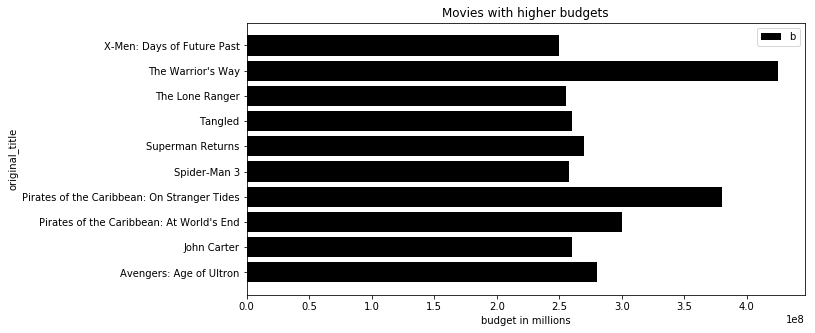

In [53]:
fig=plt.figure(figsize=(10,5))

plt.barh(df_budget.original_title,df_budget.budget,color='black')
plt.legend('budget')
label('budget in millions','original_title','Movies with higher budgets')
plt.show()

<b></a>
The graph explains the movies that used the most money during production in millions.The graph shows the warrior's way had the highest budget out of all movies.

<h1 style="color:black;font-size:20px;">Research Question 6(What is the correlation between profit,budget and revenue?)</h1></a>


In [54]:
profit=df['profit']
budget=df['budget']
revenue=df['revenue']

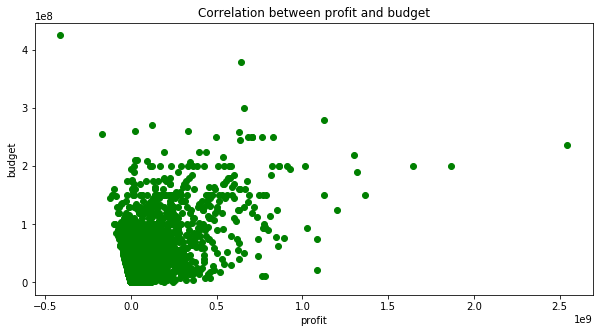

In [55]:
#plotting the correlation using scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(profit,budget,color='green')
label('profit','budget','Correlation between profit and budget')
plt.show()

<b></a>
The scatter plot shows relationship between profit and budget and how they affect each other.

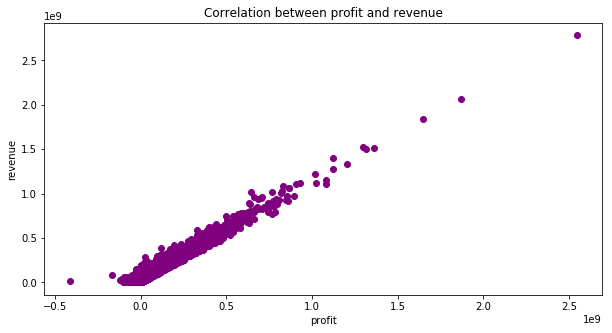

In [56]:
#plotting the correlation using scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(profit,revenue,color='purple')
label('profit','revenue','Correlation between profit and revenue')
plt.show()

<b></a>
I used a scatter plot since profit and revenue pair well together and a scatter plot visualizes their relationship well.

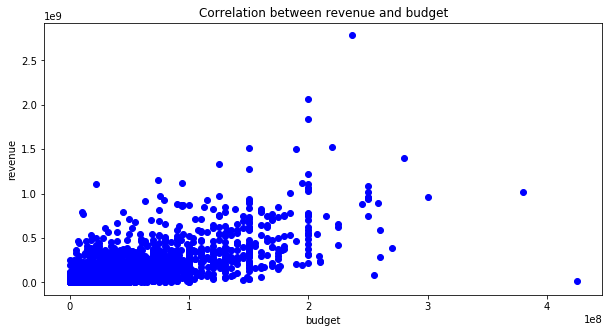

In [57]:
#plotting the correlation using scatter plot
fig=plt.figure(figsize=(10,5))
plt.scatter(budget,revenue,color='blue')
label('budget','revenue','Correlation between revenue and budget')
plt.show()

<b></a>
The graph shows relationship between revenue and budget and their correlation.The two variables pair well together hence can easily be plotted using a scatter plot.

<a id='conclusions'></a>
## Conclusions
After cleaning the movie dataset and analyzing it,I was able to get the following insights from it:
<br>1.From the first question we get to see that the movies that generated a higher profit for their respective production company,Avatar being the one with the highest profit.
<br>2.Next we get to see the movies that were voted for the most,Inception having a higher vote_count with 9767 votes.
<br>3.We also get to see that number of movies produced per year kept increasing year by year,2014 having released 638 movies.
<br>4.The scatter plots show correlations between runtime,vote count and popularity and also correlation between profit,revenue andbudget.
<br>5.According to the analysis the movie that has the highest budget is The warrior's way.

<a id='Some limitations'></a>
The limations i found in this dataset were:
<br>1.Some columns such as budget,revenue,runtime,budjet_adj and revenue_adj had zero values which could have affected my analysis so i filled them using the mean of the non-zero values.
<br>2.Some columns had data which was separated by the pipe operator such as genre column.
<br>3.When i got stuck when working on this dataset i used some codes from google:I made use of stackoverflow and GeeksforGeeks website.






In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0